# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Spicy stats is used for regressions
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#I have no idea what this is or if I should leave it
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Print to see all the cities within my list
cities[0:651]

['sisimiut',
 'rawson',
 'itarema',
 'dunedin',
 'nizhniy kuranakh',
 'mataura',
 'port elizabeth',
 'lata',
 'ponta do sol',
 'newton abbot',
 'clyde river',
 'punta arenas',
 'port blair',
 'taolanaro',
 'butaritari',
 'mahebourg',
 'namibe',
 'hilo',
 'amderma',
 'kavieng',
 'rikitea',
 'hofn',
 'alofi',
 'sayyan',
 'isangel',
 'norman wells',
 'wattegama',
 'taoudenni',
 'warrington',
 'tsihombe',
 'mata',
 'medvedka',
 'east london',
 'thompson',
 'beloha',
 'hobart',
 'dosso',
 'khatanga',
 'navrongo',
 'carnarvon',
 'louisbourg',
 'anadyr',
 'sitka',
 'souillac',
 'castro',
 'ushuaia',
 'cockburn harbour',
 'miami',
 'nizhneyansk',
 'jinxiang',
 'jamestown',
 'labuhan',
 'cape town',
 'albany',
 'prizren',
 'qaanaaq',
 'port lincoln',
 'tuktoyaktuk',
 'mar del plata',
 'acapulco',
 'sharjah',
 'ozernovskiy',
 'houston',
 'tiksi',
 'necochea',
 'mwinilunga',
 'vaitape',
 'katsuura',
 'hasaki',
 'hermanus',
 'tasiilaq',
 'kirakira',
 'port alfred',
 'tarauaca',
 'guerrero negro',


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
 # Build query URL and request your results in Celsius
#Call any city name in my list
city = "takaka"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()
#Print 200 means it's good

200


In [6]:
#Find my types to make my keys from the dictionary

weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [7]:
#Print the weather json to find each location(s) lon, lat to use informantion in constructing DataFrame
#This will pull the keys inforamtion of the city I called above 'takaka'

print(weather_json)

{'coord': {'lon': 172.8, 'lat': -40.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.56, 'feels_like': 67.46, 'temp_min': 68.56, 'temp_max': 68.56, 'pressure': 1014, 'humidity': 50, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.93, 'deg': 51, 'gust': 6.15}, 'clouds': {'all': 1}, 'dt': 1667953977, 'sys': {'country': 'NZ', 'sunrise': 1667927261, 'sunset': 1667978251}, 'timezone': 46800, 'id': 2181997, 'name': 'Takaka', 'cod': 200}


In [8]:
# Begin to parse the data

lat = weather_json["coord"]["lat"]
lon = weather_json["coord"]["lon"]
country = weather_json["sys"]["country"]
cloudiness = weather_json["clouds"]["all"]

date = weather_json["dt"]
city_name = weather_json["name"]
wind = weather_json["wind"]["speed"]

temp = weather_json["main"]["temp"]
pressure = weather_json["main"]["pressure"]
humidity = weather_json["main"]["humidity"]



In [9]:
#Check to see if the above information is calling and getting the correct numbers
pressure

1014

In [10]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:60]:
    
    # make request
    print(city)
    
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    #Use except/try to catch errors
    try:
        # get data
        weather_json = weather_response.json()

        # parse the data
        #Callables equal the cell above, pretty easy to remember
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloudiness = weather_json["clouds"]["all"]

        date_dt = weather_json["dt"]
        city_name = weather_json["name"]
        wind = weather_json["wind"]["speed"]

        temp = weather_json["main"]['temp']
        pressure = weather_json["main"]['pressure']
        humidity = weather_json["main"]['humidity']

        # Create a lists
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
     #Use except/try to catch errors       
    except Exception as e:
        print(e)
        
        # Create a lists
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
    #How can we ensure we are setting our sleep function to a sufficiant enough time?    
    time.sleep(1)

sisimiut
200

rawson
200

itarema
200

dunedin
200

nizhniy kuranakh
200

mataura
200

port elizabeth
200

lata
200

ponta do sol
200

newton abbot
200

clyde river
200

punta arenas
200

port blair
200

taolanaro
404

'coord'
butaritari
200

mahebourg
200

namibe
200

hilo
200

amderma
404

'coord'
kavieng
200

rikitea
200

hofn
200

alofi
200

sayyan
200

isangel
200

norman wells
200

wattegama
200

taoudenni
200

warrington
200

tsihombe
404

'coord'
mata
200

medvedka
200

east london
200

thompson
200

beloha
200

hobart
200

dosso
200

khatanga
200

navrongo
200

carnarvon
200

louisbourg
404

'coord'
anadyr
200

sitka
200

souillac
200

castro
200

ushuaia
200

cockburn harbour
404

'coord'
miami
200

nizhneyansk
404

'coord'
jinxiang
200

jamestown
200

labuhan
200

cape town
200

albany
200

prizren
200

qaanaaq
200

port lincoln
200

tuktoyaktuk
200

mar del plata
200

acapulco
200



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Create a DataFrame

wdf = pd.DataFrame()

wdf["City"] = names
wdf["Country"] = countries
wdf["Latitude"] = lats
wdf["Longitude"] = lngs
wdf["Date"] = dates
wdf["Wind_Speed"] = winds
wdf["Pressure"] = pressures
wdf["Humidity"] = humids
wdf["Temperature"] = temps
wdf["CLoudiness"] = clouds

wdf.head(200)



,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,CLoudiness
0,Sisimiut,GL,66.9395,-53.6735,1.667954e+09,10.92,1009.0,85.0,7.18,11.0
1,Rawson,AR,-43.3002,-65.1023,1.667954e+09,14.56,1007.0,47.0,70.81,54.0
2,Itarema,BR,-2.9248,-39.9167,1.667954e+09,11.97,1014.0,77.0,78.13,86.0
3,Dunedin,NZ,-45.8742,170.5036,1.667954e+09,4.90,1016.0,59.0,62.96,100.0
4,Nizhniy Kuranakh,RU,58.8353,125.4869,1.667954e+09,6.82,1011.0,95.0,15.35,100.0
5,Mataura,NZ,-46.1927,168.8643,1.667954e+09,8.55,1017.0,69.0,58.44,100.0
6,Port Elizabeth,ZA,-33.9180,25.5701,1.667954e+09,12.66,1012.0,82.0,63.10,100.0
7,Lata,PT,40.1629,-8.3327,1.667954e+09,3.13,1016.0,96.0,55.92,100.0
8,Ponta do Sol,PT,32.6667,-17.1000,1.667954e+09,7.54,1020.0,85.0,68.18,81.0
9,Newton Abbot,GB,50.5286,-3.6119,1.667954e+09,4.00,1000.0,93.0,53.02,100.0


In [12]:
#Make DataFrame to a CSV file
wdf.to_csv("bh_data.csv", index=False)

In [13]:
wdf.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,CLoudiness
count,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000
mean,11.778148,9.470581,1.667954e+09,8.340185,1012.518519,73.166667,54.967037,66.148148
std,40.430020,96.908973,1.326467e+02,5.593780,9.067339,19.402149,26.094030,36.948923
min,-54.800000,-169.918700,1.667953e+09,0.000000,982.000000,14.000000,-14.220000,0.000000
25%,-24.373400,-68.518550,1.667954e+09,4.527500,1009.000000,66.500000,40.700000,40.000000
50%,12.357850,-1.836150,1.667954e+09,6.955000,1013.500000,78.000000,63.095000,75.000000
75%,48.546475,89.932700,1.667954e+09,10.912500,1017.000000,85.000000,73.845000,100.000000
max,77.484000,177.483300,1.667954e+09,26.460000,1037.000000,100.000000,85.280000,100.000000


In [14]:
#Should I drop the null values in city? or should I leave them..its only five values..
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         60 non-null     object 
 1   Country      54 non-null     object 
 2   Latitude     54 non-null     float64
 3   Longitude    54 non-null     float64
 4   Date         54 non-null     float64
 5   Wind_Speed   54 non-null     float64
 6   Pressure     54 non-null     float64
 7   Humidity     54 non-null     float64
 8   Temperature  54 non-null     float64
 9   CLoudiness   54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.8+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         60 non-null     object 
 1   Country      54 non-null     object 
 2   Latitude     54 non-null     float64
 3   Longitude    54 non-null     float64
 4   Date         54 non-null     float64
 5   Wind_Speed   54 non-null     float64
 6   Pressure     54 non-null     float64
 7   Humidity     54 non-null     float64
 8   Temperature  54 non-null     float64
 9   CLoudiness   54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.8+ KB


In [17]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
mask = wdf.Humidity <= 100
df2 = wdf.loc[mask].dropna().reset_index(drop=True)
df2

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,CLoudiness
0,Sisimiut,GL,66.9395,-53.6735,1.667954e+09,10.92,1009.0,85.0,7.18,11.0
1,Rawson,AR,-43.3002,-65.1023,1.667954e+09,14.56,1007.0,47.0,70.81,54.0
2,Itarema,BR,-2.9248,-39.9167,1.667954e+09,11.97,1014.0,77.0,78.13,86.0
3,Dunedin,NZ,-45.8742,170.5036,1.667954e+09,4.90,1016.0,59.0,62.96,100.0
4,Nizhniy Kuranakh,RU,58.8353,125.4869,1.667954e+09,6.82,1011.0,95.0,15.35,100.0
5,Mataura,NZ,-46.1927,168.8643,1.667954e+09,8.55,1017.0,69.0,58.44,100.0
6,Port Elizabeth,ZA,-33.9180,25.5701,1.667954e+09,12.66,1012.0,82.0,63.10,100.0
7,Lata,PT,40.1629,-8.3327,1.667954e+09,3.13,1016.0,96.0,55.92,100.0
8,Ponta do Sol,PT,32.6667,-17.1000,1.667954e+09,7.54,1020.0,85.0,68.18,81.0
9,Newton Abbot,GB,50.5286,-3.6119,1.667954e+09,4.00,1000.0,93.0,53.02,100.0


In [28]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         54 non-null     object 
 1   Country      54 non-null     object 
 2   Latitude     54 non-null     float64
 3   Longitude    54 non-null     float64
 4   Date         54 non-null     float64
 5   Wind_Speed   54 non-null     float64
 6   Pressure     54 non-null     float64
 7   Humidity     54 non-null     float64
 8   Temperature  54 non-null     float64
 9   CLoudiness   54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.3+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

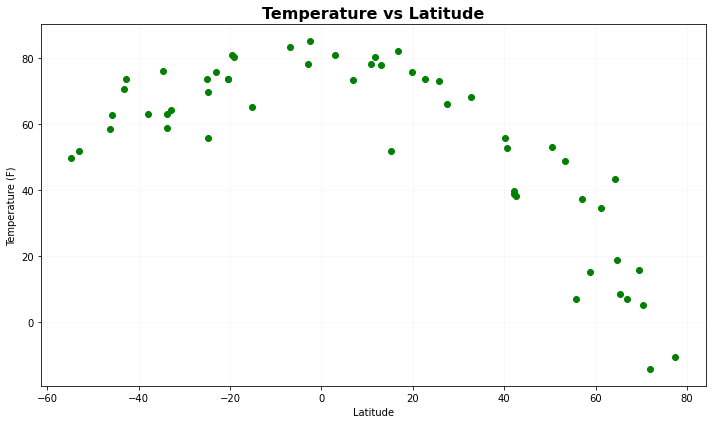

In [29]:
#Scatter plot
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Temperature, color="Green")

plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("tempvlat.png")
plt.show()

## Latitude vs. Humidity Plot

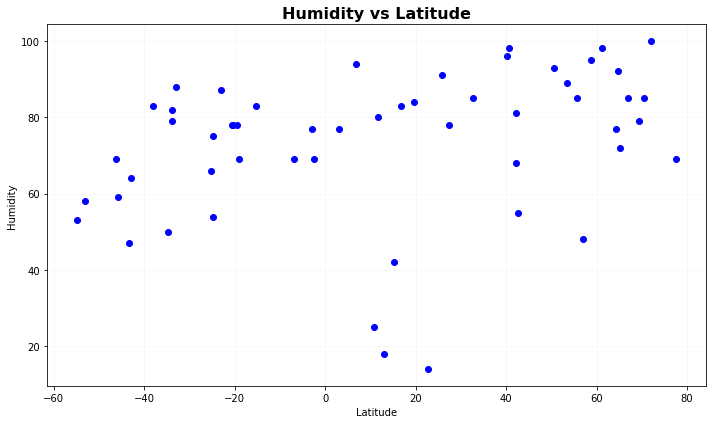

In [30]:
#Scatter plot
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Humidity, color="Blue")

plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("tempvhum.png")
plt.show()

## Latitude vs. Cloudiness Plot

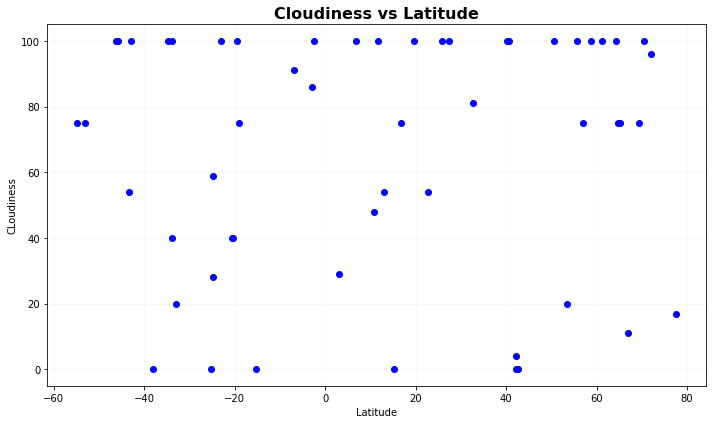

In [31]:
#Scatter plot
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.CLoudiness, color="Blue")

plt.title("Cloudiness vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("CLoudiness")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("tempvclou.png")
plt.show()

## Latitude vs. Wind Speed Plot

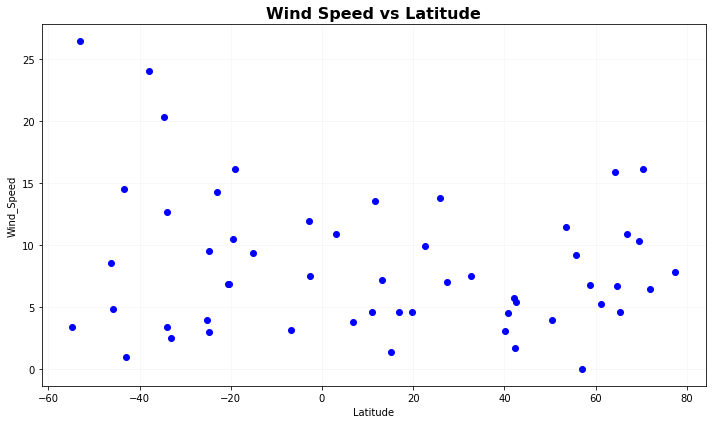

In [32]:
#Scatter plot
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Wind_Speed, color="Blue")

plt.title("Wind Speed vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("tempvwind.png")
plt.show()

## Linear Regression

In [33]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [34]:
df_N = df2.loc[df2.Latitude >= 0]
df_S = df2.loc[df2.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8266113344420474


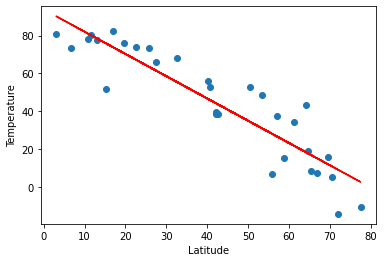

In [35]:
# Print out the r-squared value along with the plot.
x_values = df_N['Latitude']
y_values = df_N['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5618895040837546


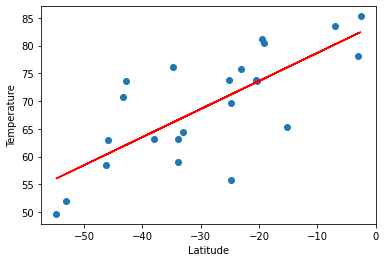

In [36]:
# Print out the r-squared value along with the plot.
x_values = df_S['Latitude']
y_values = df_S['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13573673072344516


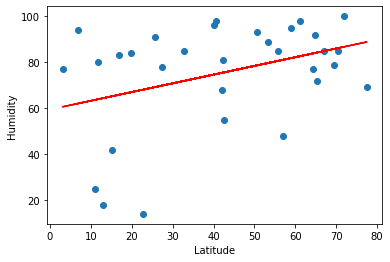

In [37]:
# Print out the r-squared value along with the plot.
x_values = df_N['Latitude']
y_values = df_N['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18736292494599363


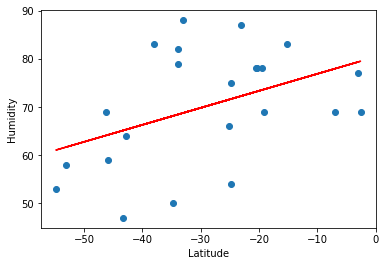

In [38]:
# Print out the r-squared value along with the plot.
x_values = df_S['Latitude']
y_values = df_S['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0036433979186120923


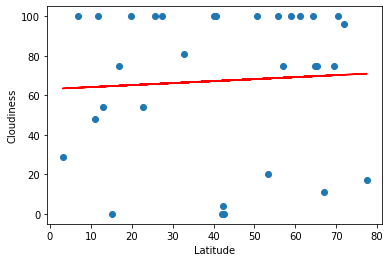

In [39]:
# Print out the r-squared value along with the plot.
x_values = df_N['Latitude']
y_values = df_N['CLoudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0022984249234585343


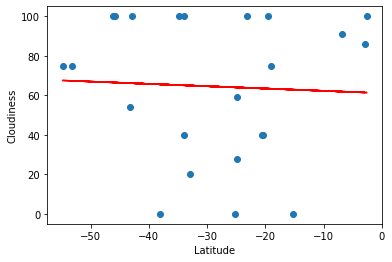

In [40]:
# Print out the r-squared value along with the plot.
x_values = df_S['Latitude']
y_values = df_S['CLoudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025457034227157522


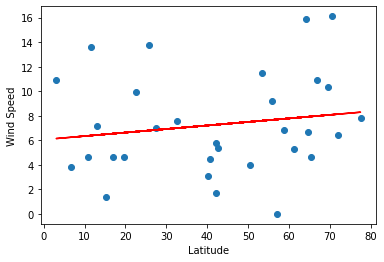

In [41]:
# Print out the r-squared value along with the plot.
x_values = df_N['Latitude']
y_values = df_N['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0281576364066404


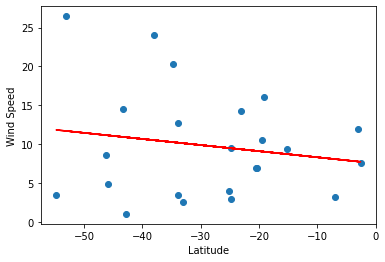

In [42]:
# Print out the r-squared value along with the plot.
x_values = df_S['Latitude']
y_values = df_S['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()